In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from srvpy.open import Registration
from srvpy.open.schemes import VInf
from paths import knight, bishop

# Basic Theory

This notebook includes basic theory behind computing shape space geodesics.

We start by loading the curves. In this example, we point data representing chess pieces knight and bishop. The curves takes values in the complex plane, meaning that the curves `c1` and `c2` are complex `ndarrays`. 

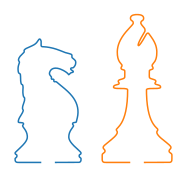

In [2]:
# Construct path using svgpathtools and compute their lengths
n = 500
t = np.linspace(0,1,n+1)
c1,l1 = knight(t)
c2,l2 = bishop(t)

# Set up a registration object
reg = Registration(c1,c2,l1=l1,l2=l2)

# Plot the shapes
plt.figure(figsize=(10,3))
plt.plot(c1.real,c1.imag)
plt.plot(c2.real+25,c2.imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

## Geometry of Curves

In the *Square Root Velocity Framework*, we identify a curve through three properties:
- Its length $L = \text{Length}(c) = \int_0^1 |c'|dt$.
- Its translation $c_0 = c(0)$.
- Its *square root velocity* (SRV) representation $q = R(c/L)$ where $R(c) = c'/ \sqrt{|c'|} $ is the *square root velocity transform*. 

The curve can be recovered using

$$
    c(t) = c_0 + L\int_0^t q(s)|q(s)|ds.
$$

Note that since $q=R(c/L)$, it follows that $\lVert q\rVert_{L^2} = 1$. Therefore, the space of SVR's can be identified with the unit sphere in $L^2$. The space of translations and lengths are $\mathbb R^d$ and $\mathbb R^+$, respectively. Therefore, we have that

$$
\begin{aligned}
    c &\sim (q,c_0,L), \\
    \text{Imm}(I,\mathbb R^d) &\sim S^1(I,\mathbb R^d) \times \mathbb R^d \times \mathbb R^+.
\end{aligned}
$$

### Geometry of the SRV
We then impose the SRV's with the natural topology of the unit sphre $S^1$. In particular, this means that pre-shape space distances are computed using the $S^1$-distance:

$$
    \text{dist}^{\mathcal C}(c_1,c_2) = \arccos\langle q_1,q_2\rangle_{L^2}.
$$

Moreover, geodesics are computed as:

$$
    \gamma_{q}(\tau) = w(1-\tau)q_1 + w(\tau) q_2,
$$

with $w(\tau) = \sin(\tau\,\text{dist}^{\mathcal C})/\sin(\text{dist}^{\mathcal C})$.


### Geometry of the Translations
For the translations, we use the natural topology of $R^d$. In particular, geodesics are convex combinations:

$$
    \gamma_{c_0}(\tau) = (1-\tau)c_1(0) + \tau c_2(0).
$$


### Geometry of the Lengths
For the lengths of the curves, we use the natural topology of $R^+$. In particular, geodesics are computed as:

$$
    \gamma_{L}(\tau) = \exp{(1-\tau)\log L_1 + \tau \log L_2}.
$$


### Geometry of the Curves
We can then use the above geometries to impose a geometry on the space of curves. 

$$
    \gamma_{\text{Imm}}(\tau) = \gamma_{c_0}(\tau) + \gamma_{L}(\tau)R^{-1}(\gamma_q(\tau))
$$

Here, we need the inverse of $R$, which is

$$
    R^{-1}(q)(t) = \int_0^t q(t)|q(t)|dt.
$$


### Using the srvpy Package

In `srvpy`, we can compute these properties using the `Registration` object. The `.preshape_geodesic(tau)` method computes $\gamma_{Imm}(\tau)$, and the `.distance()` computes $\text{dist}_{\mathcal C}$. 

Pre-shape distance before registration: 0.967


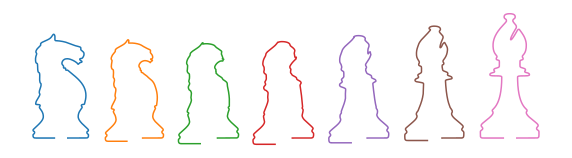

In [3]:
# Compute the pre-shape distance
dist = reg.distance()
print('Pre-shape distance before registration: {:.3f}'.format(dist))

# Compute the pre-shape space geodesic for the initial parametrization
tau = np.linspace(0,1,7)
gamma = reg.preshape_geodesic(tau)

# Plot the geodesic
plt.figure(figsize=(10,3))
for i in range(7):
    plt.plot(gamma[i,:].real+25*i,gamma[i,:].imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

## The Shape Space Distance

Now, we are not really interested in geodesics between curves, but rather geodesics between shapes. We define a shape as the equivalence class of curves modulo translation, scaling and parametrization. By construction, the SRV is invariant of translation and scaling. To quotient out the parametrization, we simply choose the parametrization which minimizes the SRV distance. 

We have an important property of the SRVT: $R(c\circ\varphi) = (R(c)\circ\varphi) \sqrt{\varphi'}$. Using this property, we have that

$$
\begin{aligned}
    \text{dist}^{\mathcal S}([c_1],[c_2]) 
        &= \min_{\varphi_1,\varphi_2}\arccos
        \Big\langle
            R\Bigl(\frac{c_1\circ\varphi_1}{L_1}\Bigr)
            ,
            R\Bigl(\frac{c_2\circ\varphi_2}{L_2}\Bigr)
        \Bigr\rangle_{L^2} \\
        &= \min_{\varphi_1,\varphi_2}\arccos
        \Big\langle
            (q_1\circ\varphi_1) \sqrt{\varphi_1'}
            ,
            (q_2\circ\varphi_2) \sqrt{\varphi_2'}
        \Bigr\rangle_{L^2} \\
        &= \arccos\max_{\varphi_1,\varphi_2}
        \Big\langle
            (q_1\circ\varphi_1) \sqrt{\varphi_1'}
            ,
            (q_2\circ\varphi_2) \sqrt{\varphi_2'}
        \Bigr\rangle_{L^2}.
\end{aligned}
$$


Hence, the geodesics of shapes can now be identified as equivalence classes of geodesics of SRV's. In particular, one representative of this equivalence class is given by

$$
    \gamma_{[q]}(\tau) = w(1-\tau)(q_1\circ\varphi_1^*) \sqrt{(\varphi_1^*)'} + w(\tau) (q_2\circ\varphi_2^*) \sqrt{(\varphi_2^*)'},
$$

where $w(\tau) = \sin(\tau\,\text{dist}^{\mathcal S})/\sin(\text{dist}^{\mathcal S})$ and $\varphi_1^*,\varphi_2^*$ solves

$$
\max_{\varphi_1,\varphi_2}
        \Big\langle
            (q_1\circ\varphi_1) \sqrt{\varphi_1'}
            ,
            (q_2\circ\varphi_2) \sqrt{\varphi_2'}
        \Bigr\rangle_{L^2}.
$$

### Using the srvpy Package

In `srvpy`, we can compute the shape space geodesics using the `.geodesic(tau,scheme)` method. This method first optimally reparametrizes the curves using the `.register(scheme)` method. Then it calls `.preshape-geodesic(tau)` to obtain the shape space geodesics.

Pre-shape distance after registration: 0.555


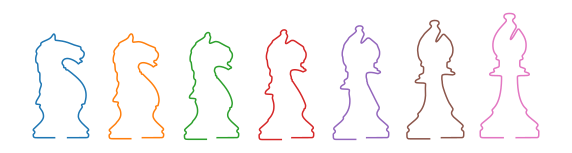

In [4]:
# Compute the shape space geodesic
gamma = reg.geodesic(tau,VInf)

# Compute the pre-shape distance
dist = reg.distance()
print('Pre-shape distance after registration: {:.3f}'.format(dist))

# Plot the geodesic
plt.figure(figsize=(10,3))
for i in range(7):
    plt.plot(gamma[i,:].real+25*i,gamma[i,:].imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()